<h1 style="text-align:center;">Confidence intervals</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Confidence interval: The probability that an unknown population parameter falls within a range of values in repeated samples.</p>
<p>It is our confidence that future independent experiments will find the same parameters.</p>
<p>P(Lower &lt Mean &lt Upper) = c</p>
<p>Most common used values are 90%, 95% and 99%.</p>
<p>Typically with less variance and larger samples, confidence intervals shrink (we can be more sure).</p>

<h1 style="text-align:center;">Computing confidence intervals</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">

Confidence interval = Sample mean +/- (t*(k) * s/sqrt(n))

<table>
    <tr>
        <td>s: </td>
        <td>standard deviation</td>
    </tr>
    <tr>
        <td>n: </td>
        <td>sample size</td>
    </tr>
    <tr>
        <td>t*(k): </td>
        <td>t value with n degrees of freedom (one-tailed)</td>
    </tr>    
</table>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.patches import Polygon

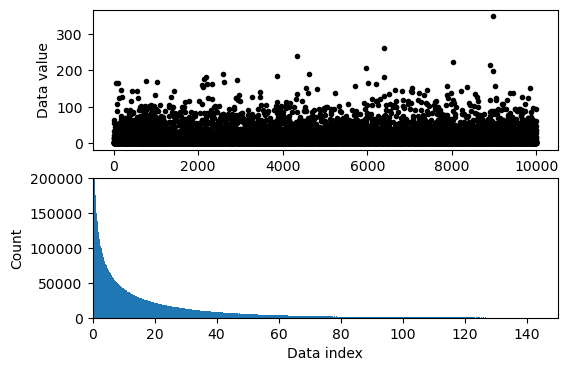

In [10]:
N = int(1e7)
population = (4 * np.random.randn(N)) ** 2
populationMean = np.mean(population)
fig,ax = plt.subplots(2,1,figsize=(6,4))

ax[0].plot(population[::1000],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Count')
ax[1].set_ylim([0,200_000])
ax[1].set_xlim([0,150])
plt.show()

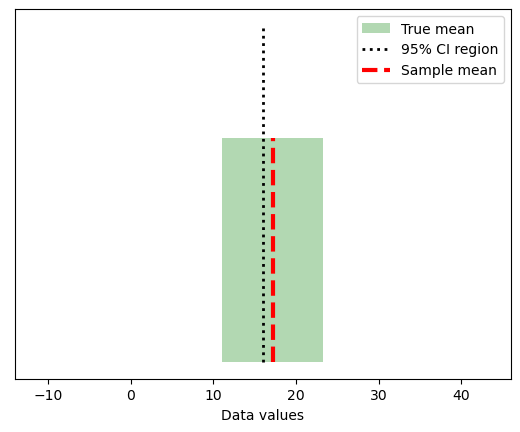

In [36]:
sampleSize = 40
confidence = 95

randomSamples = np.random.randint(0,N,sampleSize)
sampleMean    = np.mean(population[randomSamples])
sampleStd     = np.std(population[randomSamples],ddof=1)

citmp = (1-confidence/100)/2
confidenceInterval = sampleMean + stats.t.ppf([citmp,1-citmp],sampleSize-1) * sampleStd / np.sqrt(sampleSize)

fig,ax = plt.subplots(1,1)

y = np.array([ [confidenceInterval[0],0], [confidenceInterval[1],0],
               [confidenceInterval[1],1], [confidenceInterval[0],1] ])

p = Polygon(y,facecolor='g',alpha=.3)

ax.add_patch(p)
ax.plot([populationMean, populationMean],[0, 1.5],'k:',linewidth=2)
ax.plot([sampleMean    , sampleMean    ],[0, 1],'r--',linewidth=3)
ax.set_xlim([populationMean-30,populationMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('True mean', f'{confidence}% CI region', 'Sample mean'))

<h1 style="text-align:center;">Bootstrapping (resampling)</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>We take a lot of random samples and we take the distribution of the means of them. Inside of a sampling repeating is allowed. Then we calculate a confidence interval for that.</p>